In [225]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Section 8: Import the data


In [226]:
df_purchase = pd.read_csv(
    "/home/angelo/repos/vscode_repos/customer_analytics_2022/Data/purchase data.csv"
)

#### Describe the data in very basic terms

In [227]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [228]:
# this is pointless as customers visited the store with a different number of times
df_purchase.describe()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,5.869300e+04,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,...,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,2.000003e+08,349.431074,0.249399,0.844309,0.691973,0.840799,0.248070,1.392074,1.780999,2.006789,...,0.042799,0.117851,0.035865,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,1.443167e+02,212.045058,0.432669,1.633083,1.498734,1.631628,0.431897,0.091139,0.170868,0.046867,...,0.202405,0.322434,0.185954,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,2.000000e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1.260000,1.870000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,2.000001e+08,161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.340000,1.580000,1.970000,...,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,2.000003e+08,343.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.390000,1.880000,2.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,2.000004e+08,530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470000,1.890000,2.060000,...,0.000000,0.000000,0.000000,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,2.000005e+08,730.000000,1.000000,5.000000,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,...,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


In [229]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## Data Segmentation

remember; in the before subject we segmented the data by following the following process:
1. standardize the data (7 original features)
2. then applied pca to reduce the 7 original features into 3 components
3. then, onto the 3 components a k-means was applied to segment the data into k = 4 groups

GOAL NOW: We got new customer data; so apply the already trained model onto them to class them accordingly 

in order for that to work:
1. select each individual customer ONCE from the data above (as one customer can appear multiple times in the dataset for different purchases)
2. then transform the customers using the already trained scaler (you use the already trained scaler as the pca and kmeans before were also build using this scaler; if you would retrain, the input might change as eg a certain range may now be larger)
3. then decompose the number of features for those new customers as well using the already trained pca model
4. after that you can apply the k means model that was already trained in order for the new customers to be grouped in one of the 4 clusters/segments previously identified; so you use the kmeans to predict the segment of the new customers based on the preexisting segments that were established using the original data

#### Import the Segmentation models

pickle models are in the same directory as the notebook initially!

In [230]:
scaler = pickle.load(
    open(
        "/home/angelo/repos/vscode_repos/customer_analytics_2022/pickle_data_models/scaler.pickle",
        "rb",
    )
)

In [231]:
pca = pickle.load(
    open(
        "/home/angelo/repos/vscode_repos/customer_analytics_2022/pickle_data_models/pca_3.pickle",
        "rb",
    )
)

In [232]:
kmeans_pca = pickle.load(
    open(
        "/home/angelo/repos/vscode_repos/customer_analytics_2022/pickle_data_models/kmeans_pca_4.pickle",
        "rb",
    )
)

#### apply the already trained scaler on the new data 

In [233]:
# only apply transform; fit would mean that the model is retrained; here we only want to apply it on the data --> so only transform
features = df_purchase.iloc[:, -7:]

# apply the scaler
df_purchase_segm_std = scaler.transform(features)

#### apply the already trained pca_3 (here just pca) on the data 

In [234]:
# remember that customers may be duplicates
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

#### apply the already trained kmeans model which was trained on the 3 components of the pca model and had k = 4 groups

In [235]:
# now apply the kmeans on it: use the predict method here
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

#### this is now the new dataframe containing the predicted segments for the customers

In [236]:
df_purchase_predictors = df_purchase.copy()
df_purchase_predictors["Segment"] = purchase_segm_kmeans_pca

## Section 9:  Descriptives Anaylsis by Segments

#### Data analysis by customer

In [237]:
df_purchase_predictors_customer = df_purchase_predictors.drop_duplicates(
    subset=["ID"], keep="first"
)

#### Obtain the number of store visits in total by counting the number of appearances of ID in the data  

In [238]:
# obtain the number of purchases (incidence) per individual customer
# this is the purchase probability
temp1 = (
    df_purchase_predictors.loc[:, ["ID", "Incidence"]]
    .groupby(by=["ID"], as_index=False)
    .count()
)
temp1 = temp1.set_index("ID")
temp1 = temp1.rename({"Incidence": "N_Visits"}, axis=1)
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


#### 1) Obtain the purchase probability (customer entering a store and purchasing a product)

Incidence is just how often a customer purchased from a specific category; so if incidence = 1, they purchased from category! Purchase probabaility in general

In [239]:
temp2 = (
    df_purchase_predictors.loc[:, ["ID", "Incidence"]]
    .groupby(by=["ID"], as_index=False)
    .sum()
)
temp2 = temp2.set_index("ID")
temp2 = temp2.rename({"Incidence": "N_Purchase"}, axis=1)
temp2.head()

,N_Purchase
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13


In [240]:
# merge temp1 & temp2
temp3 = temp1.join(temp2)

In [241]:
temp3.head()

,N_Visits,N_Purchase
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


#### Calcualte the individual customer purchase probability

In [242]:
temp3["Average_N_Purchases"] = temp3["N_Purchase"] / temp3["N_Visits"]

In [243]:
temp3.head()

,N_Visits,N_Purchase,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


#### add to which segment each customer belongs

In [244]:
temp_customer_segment = df_purchase_predictors.loc[
    :, ["ID", "Segment"]
].drop_duplicates(subset=["ID"])
temp_customer_segment_dict = temp_customer_segment.set_index("ID").to_dict()["Segment"]
temp_customer_segment = None

# apply map by passing the dictionary with key = ID; Value = segment
temp3["Segment"] = temp3.index.map(temp_customer_segment_dict)

df_pirchase_descr = temp3.copy()
temp3 = None

In [245]:
df_pirchase_descr.head()

,N_Visits,N_Purchase,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,3
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1


### Analyse the Segment Behaviour ( Segment Proportions)



#### I) Proportion of purchases by segment
Meaning: proportion of all successful purchases (so not vists; its only about when a customer has purchased a product from a specific category; nothin else)
--> but this variable describes the within group varaince very well 

i) count number of incidents (N_Purchases) per segment

ii) divide by the number of visits (N_Visits) by segment

In [246]:
# i) count number of incidents per segment
segm_prop = df_pirchase_descr.groupby(["Segment"]).agg(
    N_Purchases_segm=("N_Purchase", "count")
)

In [247]:
# ii) divide by total number of purchases overall
segm_prop["Segment Proportions"] = (
    segm_prop["N_Purchases_segm"] / segm_prop["N_Purchases_segm"].sum()
)

In [248]:
segm_prop

,N_Purchases_segm,Segment Proportions
Segment,,
0,103,0.206
1,110,0.220
2,189,0.378
3,98,0.196


Text(0.5, 1.0, 'Segment Proportions')

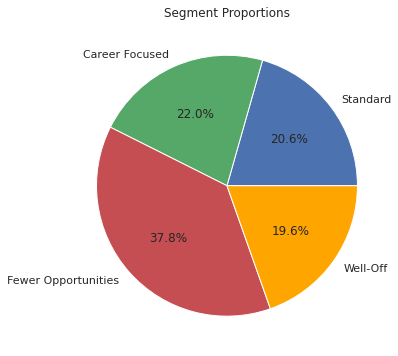

In [250]:
# plot
plt.figure(figsize=(9, 6))
plt.pie(
    segm_prop["Segment Proportions"],
    labels=["Standard", "Career Focused", "Fewer Opportunities", "Well-Off"],
    # creates automatic percentages in pie chart
    autopct="%1.1f%%",
    colors=["b", "g", "r", "orange"],
)
# plt.show()
plt.title("Segment Proportions")

So:
- fewer opportunites purchases the most of the category; (note: maybe they are also the largest, so a proportional analysis is not the real)

## II) Finally: purchase Occasions and Purchase Incidence

this measure will describe the pruchase propability of a customer; so propability of custoemr enterin store & pruchasing product from category--> Purchase propability by segment

- i) how often do people from different segments visit the store
- ii) how often do they buy from the specific cateogry in question
- iii) how often do they buy compared to the number of store visits 

Calcualte mean & std per segment 

In [254]:
segments_mean = df_pirchase_descr.groupby(by=["Segment"]).mean()
segments_mean

,N_Visits,N_Purchase,Average_N_Purchases
Segment,,,
0,117.699029,24.902913,0.212773
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.295918,34.602041,0.284478


In [255]:
segments_std = df_pirchase_descr.groupby(by=["Segment"]).std()
segments_std

,N_Visits,N_Purchase,Average_N_Purchases
Segment,,,
0,19.039605,16.774464,0.126603
1,44.864656,53.744530,0.200056
2,16.410498,13.815040,0.120335
3,20.716152,25.900579,0.171787


#### Use Bar-charts; each bar == one segment to compare them

Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

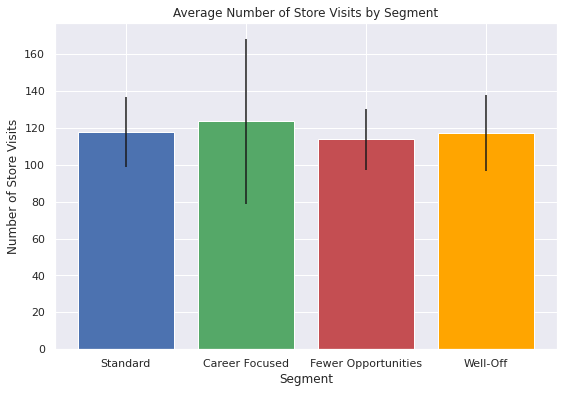

In [259]:
# store visits barchart
plt.figure(figsize=(9, 6))
plt.bar(
    x=(0, 1, 2, 3),
    tick_label=("Standard", "Career Focused", "Fewer Opportunities", "Well-Off"),
    height=segments_mean["N_Visits"],
    # yerr == y-error, which is the std in this case
    yerr=segments_std["N_Visits"],
    color=["b", "g", "r", "orange"],
)
plt.xlabel("Segment")
plt.ylabel("Number of Store Visits")
plt.title("Average Number of Store Visits by Segment")

the vertical line (small-thin black line) shows how dispersed the data is

results:
- Fewer opportunites visit the store least open
- career focused visit it the most; but also with the most variance implying that they are least homogenous with regards to the visits
- Standartd, fewer opportunites, Well-off are similar wrt store visits on average per customer in those segments

#### Use barchats to see how often each segment chooses to buy a product from the category

Text(0.5, 1.0, 'Average number of purchases by Segment')

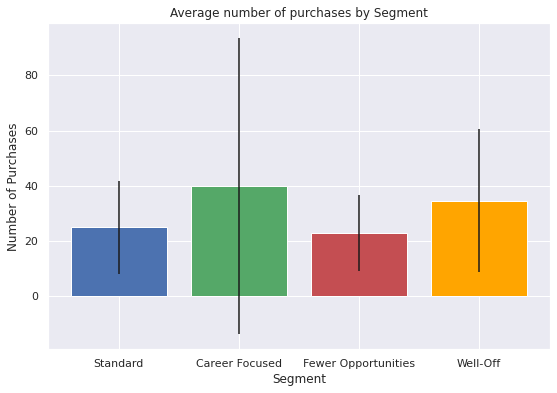

In [265]:
# store visits barchart
plt.figure(figsize=(9, 6))
plt.bar(
    x=(0, 1, 2, 3),
    tick_label=("Standard", "Career Focused", "Fewer Opportunities", "Well-Off"),
    height=segments_mean["N_Purchase"],
    # yerr == y-error, which is the std in this case
    yerr=segments_std["N_Purchase"],
    color=["b", "g", "r", "orange"],
)
plt.xlabel("Segment")
plt.ylabel("Number of Purchases")
plt.title("Average number of purchases by Segment")

Analysis
- again career focused buys the most, but again with the msot variance --> appears to have outliers
- fewer opportunites seems to be the most homogenoues ; but also shopping the least oin the category


#### Barchart buy items proportionally

Text(0.5, 1.0, 'Proportion Item Purchases to visits by Segment')

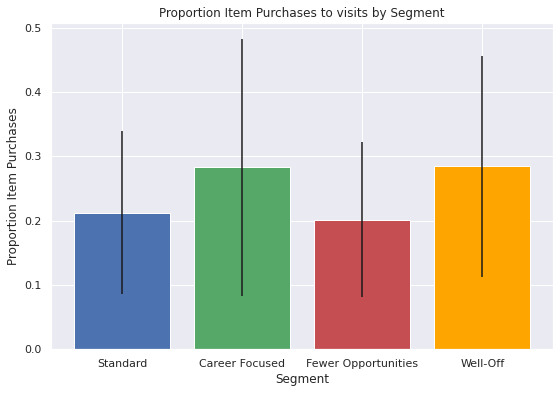

In [264]:
# store visits barchart
plt.figure(figsize=(9, 6))
plt.bar(
    x=(0, 1, 2, 3),
    tick_label=("Standard", "Career Focused", "Fewer Opportunities", "Well-Off"),
    height=segments_mean["Average_N_Purchases"],
    # yerr == y-error, which is the std in this case
    yerr=segments_std["Average_N_Purchases"],
    color=["b", "g", "r", "orange"],
)
plt.xlabel("Segment")
plt.ylabel("Proportion Item Purchases")
plt.title("Proportion Item Purchases to visits by Segment")

#### 2) Obtain the brand purchase probability; that the customer buys from the right brand in the case of buying from a category (BRAND CHOICE!)

THIS IS CONDICITION: So conditional that an incidence did happen (a product from the category was purchased in a specific purchase), what is the probablity of the choice being a specific brand?

In [272]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors.Incidence == 1]

In [285]:
# in order to aggreagate the data for a specific brand
# create a dummy variable per brand (so new column)
brand_dummies = pd.get_dummies(
    df_purchase_incidence["Brand"], prefix="Brand", prefix_sep="_"
)

In [286]:
# assign both segment and Id to the brand_dummies dataframe
brand_dummies["Segment"], brand_dummies["ID"] = (
    df_purchase_incidence["Segment"],
    df_purchase_incidence["ID"],
)

In [287]:
# get the average brandchoice per customer
temp = brand_dummies.groupby(["ID"], as_index=True).mean()

# tehn group by segment to find the average brand choice per segment
mean_brand_choice = temp.groupby(["Segment"], as_index=True).mean()

In [288]:
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0.0,0.251186,0.396502,0.156481,0.059474,0.136357
1.0,0.072871,0.146808,0.039976,0.112395,0.627951
2.0,0.137567,0.681190,0.020923,0.061548,0.098772
3.0,0.041928,0.117422,0.030610,0.613623,0.196417


Text(0.5, 1.0, 'Average Brand Choice by Segment')

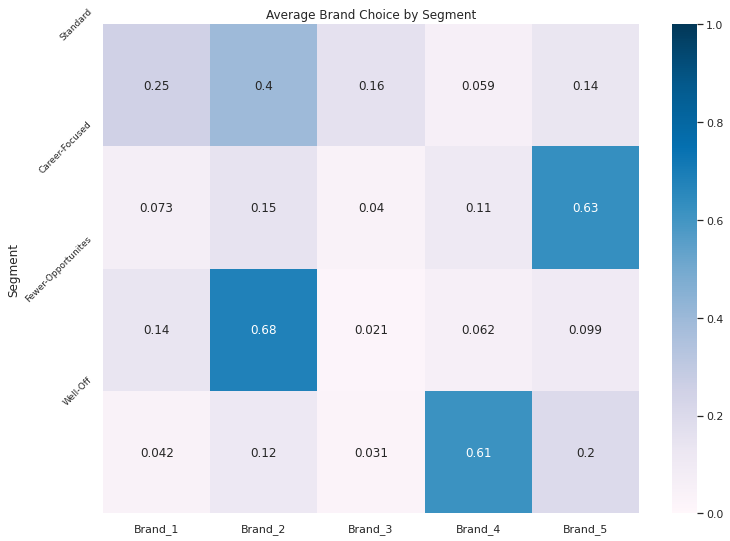

In [289]:
# use a heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(mean_brand_choice, vmin=0, vmax=1, cmap="PuBu", annot=True)
# add the segment names
plt.yticks(
    [0, 1, 2, 3],
    ["Standard", "Career-Focused", "Fewer-Opportunites", "Well-Off"],
    rotation=45,
    fontsize=9,
)
plt.title("Average Brand Choice by Segment")

Note: brand 1 is the least expensive; brand 5 is the most expensive

- Fewer Opportunites: mostly Brand_2 (not the super cheap but ok)
- Career Focused: mostly Brand 5 which is the expensive luxury version; so this segment might look for this specifically, suggesting that this segment is less sensitive to the price simply because it might jsut look for status 
- well off takes the brand 4 
- Standard is very heterogeneous --> so we might try to influence them to try out different brands

## Revenue total spending per segment & reveneu per brand

#### revenue per brand
Only one transaction (of one brand) is stored per instance

In [323]:
segments_brand_revenue = pd.DataFrame()
for i in range(1, 6):
    # start with brand 1
    temp = df_purchase_incidence[df_purchase_incidence.Brand == i]

    # calcualte reveneu for this brand; Price * Quantitiy
    temp.loc[:, "Revenue Brand " + str(i)] = temp["Price_" + str(i)] * temp["Quantity"]

    # create a dataframe where to store all information regarding revenue
    segments_brand_revenue[["Segment", "Revenue Brand " + str(i)]] = (
        temp[["Segment", "Revenue Brand " + str(i)]]
        .groupby(["Segment"], as_index=False)
        .sum()
    )

/tmp/ipykernel_41039/1869656030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand '+ str(i)] = temp['Price_' + str(i)] * temp['Quantity']
/tmp/ipykernel_41039/1869656030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, 'Revenue Brand '+ str(i)] = temp['Price_' + str(i)] * temp['Quantity']
/tmp/ipykernel_41039/1869656030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [330]:
# now calcualte the total reveneue by segment
# two ways:
segments_brand_revenue["Total Revenue"] = segments_brand_revenue.iloc[:, 1:].sum(axis=1)

# or
# segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'],
#                                            segments_brand_revenue['Revenue Brand 2'],
#                                            segments_brand_revenue['Revenue Brand 3'],
#                                            segments_brand_revenue['Revenue Brand 4'],
#                                            segments_brand_revenue['Revenue Brand 5'])

In [332]:
# add the segment names
segments_brand_revenue["Segment"] = segments_brand_revenue["Segment"].map(
    {0: "well-off", 1: "fewer-opportunities", 2: "standard", 3: "Career-Focused"}
)

In [336]:
segments_brand_revenue["Segment Proportions"] = segm_prop["Segment Proportions"]

In [337]:
segments_brand_revenue.set_index(["Segment"])

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
well-off,2611.19,4768.52,3909.17,861.38,2439.75,29180.02,0.206
fewer-opportunities,736.09,1746.42,664.75,2363.84,19441.06,49904.32,0.220
standard,2258.90,13955.14,716.25,1629.31,2230.50,41580.20,0.378
Career-Focused,699.47,1298.23,731.35,14185.57,5509.69,44848.62,0.196


Analyse:
1. Career Focuse and well off bring the most revenue (even thoug hit is not large)
--> so career focused are generally quite big and yield revenue enmass
2. standard segment makes the most people but cntributes least money
3. well off and fewer opportunites bring in similar reneune while the well off is the smallest segment of all

--> this means that we have to apply different measures to the groups in order to drive their revenue 


--> Brand 3 also has the least revenue
--> brand 4 and well off seems to show some soret of loyalty... so we might increase price of brand 4 (less elastic behaviour)

In [204]:
# get unique customers
# note: You might  skip on this one as every instance is equally scaled anyway
df_purchase_customers = df_purchase.drop_duplicates(
    subset=["ID"], keep="first"
).reset_index()

# select the relevant features (7 in number)
df_purchase_customers = df_purchase_customers.iloc[:, -7:]

# obtain the column names
feature_names = df_purchase_customers.columns.values


df_purchase_std = pd.DataFrame(
    data=scaler.transform(df_purchase_customers), columns=features
)

ValueError: Index data must be 1-dimensional